**Rationale** Perhaps the most important medium of communicating data-driven insights is through the construction of effective graphs. This assignment is designed for you to practice making some common types of graphs.

[Datasets](https://drive.google.com/open?id=1-oR65kkGk7TIzBtRGXVWhkeU1q7yIc-x&authuser=tul67796%40temple.edu&usp=drive_fs) required

1. [Rent the Runway item fit](https://drive.google.com/open?id=15UtPTWFea2YfU51SRrZJDyM4aI0YXVFU&authuser=tul67796%40temple.edu&usp=drive_fs)
1. [Orange Telecom customer churn](https://drive.google.com/open?id=15eDf_6pamH9GLA1PNMdOlF4YSYHu_zc8&authuser=tul67796%40temple.edu&usp=drive_fs)

# 1. (5 points) Bar Plot - Rent the runway dataset

For categories with at least 100 observations, plot the proportion of reviews that indicated that the item fits using a bar plot.

Answer these questions (see detailed prompt at end of section):

1. Which categories fit the best? Which categories fit the worst?
1. Does this bar plot confirm or reject your prior expectations? Explain.
1. How can you mitigate the fit issues?


**Follow each of the steps below**

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
# import the libraries you need: (pandas, matplotlib)
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
# specify the folder in your Google MyDrive containing the datasets for this assignment
fpath = 'drive/MyDrive/Marketing Customer Data Analytics/Assignment 4/'
os.listdir(fpath)

['copy_renttherunway_final_data.json', 'copy_telecom_churn.csv']

In [4]:
# read in file use read_json(fpath + 'rentherunway_final_data.json', lines = True)
# call the dataframe: rent
rent = pd.read_json(fpath + 'copy_renttherunway_final_data.json', lines = True )


In [5]:
# preview the first 5 rows the dataset to get a sense of its contents

rent.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


**Double click to edit** 

Fill in the blanks

* In the dataframe `rent`, one row represents the data for one ___Rental Review____

To construct a dataframe that has 1 row = 1 category and summarize the number of rows per category:

* Which variable should you groupby? __Category____
* Which variable can you summarize? _rating_______________
* Which summary function should you use? __.count______________

In [6]:
# execute the groupby to construct the desired dataframe (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): count100

count100 = rent.groupby('category')['rating'].count().reset_index()


In [7]:
# rename the columns to 'category' and 'obs'

count100.rename(columns = {'rating': 'obs'}, inplace = True)




In [8]:
count100.head()

,category,obs
0,ballgown,16
1,blazer,782
2,blouse,651
3,blouson,14
4,bomber,128


**Double click to edit**\
Fill in the blanks

To merge `cat100` and `rent`, we should use ___count 100_________ as the left dataframe and ___rent_________ as the right dataframe.

We should merge on the variable ____category_________________

We will use an inner merge.

In [9]:
# merge count100 with the rent, reuse the variable rent by replacing it with the result of the merge

rent = rent.merge(count100, how = 'inner', on = 'category')


In [10]:
# preview rent dataframe to show that there's a new column: "obs"

rent.head()


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016",3070
1,fit,434928,32b,2429745,125lbs,10.0,vacation,Incredibly comfortable and really flattering. ...,straight & narrow,Love this Romper!,romper,"5' 9""",8,36.0,"March 24, 2017",3070
2,fit,74328,NaN,2343054,125lbs,8.0,work,"I am normally a 4, but always size up with rom...",NaN,Comfortable and flattering.,romper,"5' 4""",12,32.0,"July 17, 2016",3070
3,fit,885043,34d,2650125,140lbs,10.0,date,I loved wearing this! I wore it for a Valenti...,hourglass,Beautiful sexy romper,romper,"5' 4""",14,27.0,"February 21, 2017",3070
4,fit,557692,NaN,2478188,135lbs,10.0,party,It can be a little short although it has short...,NaN,Was comfortable but cute for my Karaoke party.,romper,"5' 5""",4,33.0,"June 12, 2016",3070


In [11]:
# what are the unique values in fit column? select the fit column and use the .unique() method

rent.fit.unique()

array(['fit', 'large', 'small'], dtype=object)

In [12]:
# create a column in rent called 'fit1'

# first initialize the fit1 column where all observations in the column are 0's 
# modify the generic syntax df['column name'] = 0

rent['fit1'] = 0
# select the subset of fit1 column where fit column has the value "fit"
## e.g. select rows where fit column has the value 'fit' and the column 'fit1'
## set these rows of the fit1 column = 1 (modify the syntax df.loc[conditions, 'column name'] = 1)
rent.loc[rent.fit == 'fit', 'fit1'] =1


In [13]:
rent.fit

0           fit
1           fit
2           fit
3           fit
4           fit
          ...  
192539    large
192540    large
192541    large
192542    large
192543    large
Name: fit, Length: 192544, dtype: object

In [14]:
rent.fit == 'fit'

0          True
1          True
2          True
3          True
4          True
          ...  
192539    False
192540    False
192541    False
192542    False
192543    False
Name: fit, Length: 192544, dtype: bool

In [15]:
# sample 20 random rows of the rent dataframe, make sure the fit1 column corresponds
# to the correct rows as indicated by the fit column
# (run the code several times if you don't see any rows that indicate item did not fit (fit1 is 0))

rent.sample(20)


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,obs,fit1
135240,fit,626648,32a,1857721,128lbs,10.0,vacation,Loved this dress. It is super comfy and easy t...,NaN,"Fun dress, gorgeous colors",dress,"5' 9""",8,30.0,"January 1, 2018",92850,1
32761,large,826968,NaN,1768942,NaN,2.0,wedding,I normally wear a size 18 in formal gowns but ...,athletic,"Didn't get to wear for the event, since the dr...",gown,"5' 7""",45,34.0,"April 11, 2016",44335,0
43908,small,360614,34d,131698,165lbs,6.0,formal affair,I chose to return this dress for RTR credit. ...,hourglass,"Beautiful dress, runs a little small",gown,"5' 6""",20,30.0,"May 3, 2016",44335,0
37102,fit,931980,34a,125465,115lbs,10.0,wedding,I wore this dress to a black tie optional wedd...,petite,Great dress!,gown,"5' 1""",0,33.0,"October 27, 2015",44335,1
72024,fit,997301,36b,133584,150lbs,8.0,wedding,"The fit is overall true to size, but the arms ...",pear,Pretty and classic,dress,"5' 6""",16,36.0,"June 27, 2013",92850,1
85572,fit,335198,32b,884737,115lbs,10.0,work,I wore this to a formal Insurance sales meetin...,straight & narrow,Stylish but appropriate for work,dress,"5' 5""",4,39.0,"May 25, 2017",92850,1
142684,fit,598009,36d,947192,140lbs,8.0,wedding,"Great dress, but I have a large bust and it wa...",hourglass,It was super cute....on my sister.,dress,"5' 5""",16,36.0,"November 18, 2015",92850,1
38350,fit,753800,34d,1146287,155lbs,8.0,other,Was looking for something a little edgier for ...,full bust,Fun and different,gown,"5' 10""",17,47.0,"November 26, 2015",44335,1
5400,fit,528552,36c,1390827,150lbs,10.0,formal affair,"Loved this dress, it was so comfortable! I wa...",athletic,Cute and comfortable,gown,"5' 7""",16,28.0,"September 18, 2017",44335,1
22322,fit,356274,36c,128959,NaN,10.0,formal affair,After reading ALL of the reviews for this dres...,hourglass,PERFECT! I love this dress so much!,gown,"5' 5""",21,29.0,"February 15, 2017",44335,1


In [16]:
# Create a new dataframe, rent100, that is the subset of rows of rent that come from categories with at least 100 observations
# Modify the generic syntax newdf = olddf.loc[condition]

rent100 = rent.loc[rent.obs >= 100 ]

**Double click to edit** 

To construct a dataframe that has 1 row = 1 category and summarize the proportion of rental reviews that indicate the item from that category fits

* Which variable should you groupby? ____category____________
* Which variable can you summarize? _____fit1___________
* Which summary function should you use? ___.mean_____________

In [17]:
# execute the groupby
# (remember to add .reset_index() to the end of the groupby statement)
# call the resulting dataframe (assign to this variable): fit100 

fit100 = rent100.groupby('category')['fit1'].mean().reset_index()


In [18]:
# display the fit100 dataframe, make sure it contains the expected information
# e.g. category and proportion of fit

fit100


,category,fit1
0,blazer,0.760870
1,blouse,0.743472
2,bomber,0.734375
3,cardigan,0.659751
4,coat,0.595918
5,culottes,0.691489
6,down,0.698276
7,dress,0.716668
8,frock,0.687805
9,gown,0.792614


In [19]:
# sort this fit100 dataframe from smallest to largest proportion
# be sure to specify the inplace = True option to alter the dataframe
# we need this step to make the resulting bar plot ordered from shortest 
# to tallest bar
# modify the generic syntax df.sort_values(by = 'sort column name', inplace = True)

fit100.sort_values(by ='fit1', inplace = True)

In [20]:
# display the resulting dataframe again to make sure it is properly sorted
fit100


,category,fit1
30,vest,0.586331
4,coat,0.595918
16,pants,0.623223
21,shirt,0.631769
29,tunic,0.641975
3,cardigan,0.659751
20,shift,0.683504
23,skirt,0.686479
8,frock,0.687805
27,tank,0.690608


<Figure size 1440x1440 with 0 Axes>

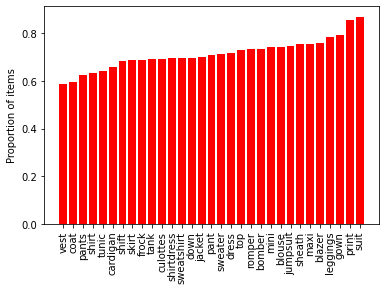

<Figure size 1440x1440 with 0 Axes>

In [21]:
# construct the bar plot
# make the bar plot easy to read by:
# adjust the figure size
# x-axis labels degrees
# other appearance parameters

# MAKE SURE TO LABEL YOUR AXES

plt.bar(fit100.category, fit100.fit1, color = 'red')
plt.xticks(rotation=90)
plt.ylabel('Proportion of items')
plt.figure(figsize = (20,20))





**Double Click to Edit**
1. The category that fit best is _____suit__________________.
    1. The category that fit worst is ______vest_________________.
1. (Explain why the plot makes (or doesn't make) sense. Write at least 4 sentences.)
The plot makes sense, because we merged the fit proportion to the catrgory of clothing. The bar graph exemplifies that the higher the proportion, the better fit the article of clothing was. The merge allowed us to view the fit in one graph, forcing it to make sense according to the datasets. To ensure it makes sense, use sample data to check if the graph matches the sample data. 
1. Two strategies that can mitigate the fit issues are:
    1. (Explain first strategy)
    Writing more reviews can mitigate fit issues as it provides more detail for customers to utilize. 
    1. (Explain second strategy)
    Design inprovements, such as detailed entries of each review, in depth explanation on the fit of the outfit

# 2. (5 points) Scatter plot - Orange Telecom

Create 2 plots: 

First, construct a scatter plot that visualizes the relationship between the number of calls made and the cost per call paid.

Second, construct a scatter plot that visualizes total minutes used and average rate paid per minute, use color to indicate churned customers.

Note that customer **churn** is the marketing term for a customer who has defected / ended the business relationship (cancelled their contract).

Be sure to:
1. **adjust the sizes / colors / transparency** of the points to be visually appealing.
1. Label your axes

Questions:
1. Describe the relationship between number of calls and cost per call.
    1. What might explain this relationship?
1. Describe any differences in the usage patterns among customers who have churned vs. those who have not?
    1. What might cause the(se) difference(s)?

**Follow the detailed prompts below**

In [22]:
fpath = 'drive/MyDrive/Marketing Customer Data Analytics/Assignment 4/'
os.listdir(fpath)

['copy_renttherunway_final_data.json', 'copy_telecom_churn.csv']

In [23]:
# read in your dataset using read_csv(fpath + 'telecom_churn.csv')
# call the dataframe orange

orange = pd.read_csv(fpath + 'copy_telecom_churn.csv')


In [24]:
# preview the first 5 rows to get a sense of this data

orange.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Double click to edit**
Fill in the blank
1. Each row represents the data for one __phone plan data_____________________.

In [25]:
#Ryan Konopelski aided me to get this code
# create 3 new columns:
# 'Total_Minutes': sum of total day, eve, night, and international minutes
# 'Total_Charges' sum of total day, eve, night, and international charges
# 'Total_Calls' sum of total day, eve, night, and international calls

orange['Total_Minutes']=orange['Total day minutes']+orange['Total eve minutes']+orange['Total night minutes']+orange['Total intl minutes']
orange['Total_Charges']=orange['Total day charge']+orange['Total eve charge']+orange['Total night charge']+orange['Total intl charge']
orange['Total_Calls']=orange['Total day calls']+orange['Total eve calls']+orange['Total night calls']+orange['Total intl calls']

orange

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336


In [26]:
# create 2 additional columns
# 'Avg_Rate': the average charge per minute (use columns created above to help you make the new column)
# 'Cost_Per_Call': the average charge per call (use columns created above to help you make the new column)

orange['Avg_Rate']=orange['Total_Charges']/orange['Total_Minutes']
orange['Cost_Per_Call']=orange['Total_Charges']/orange['Total_Calls']

orange



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_Minutes,Total_Charges,Total_Calls,Avg_Rate,Cost_Per_Call
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2,75.56,303,0.105354,0.249373
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2,59.24,332,0.094754,0.178434
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4,62.29,333,0.115480,0.187057
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8,66.80,255,0.118272,0.261961
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0,52.09,359,0.101738,0.145097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,660.7,60.10,292,0.090964,0.205822
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,585.4,63.53,239,0.108524,0.265816
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,675.6,67.74,264,0.100266,0.256591
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,517.6,57.53,336,0.111148,0.171220


Text(0, 0.5, 'Cost Per Call')

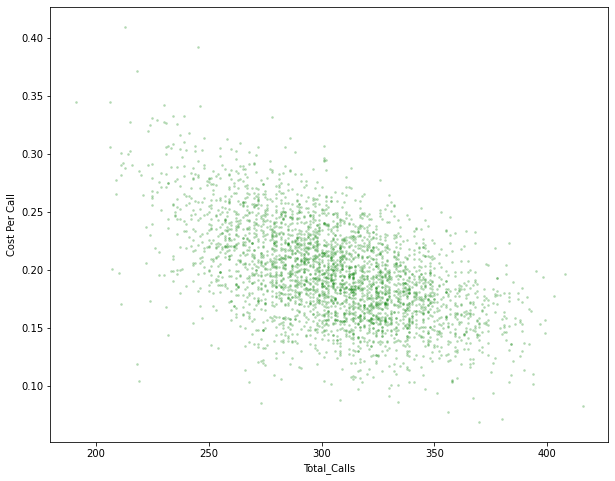

In [27]:
# Create the first scatter plot
# Use the x-axis for number of calls
# Use the y-axis for the cost per call
# Label both axes
# play with plotting parameters (size, alpha, figure size, etc.) to make the plot more appealing
# make the figure size 10 x 8

plt.figure(figsize=(10,8))
plt.scatter(orange.Total_Calls,
            orange.Cost_Per_Call, 
            c = 'green',
            alpha = .2,
            s = 3)
plt.xlabel('Total_Calls')
plt.ylabel('Cost Per Call')



**Double Click to Edit**

Answers

1. (Describe the relationship between calls and cost per call)
  The more you call, the lesser the cost
    1. (Reason 1 for why this relatinship may exist)
    They may be giving back and helping the consumer save money in the long run
    1. (Reason 2 for why this relationship may exist)
    International calls are more expensive than national calls, so chances are you call people more that are in a closer distance because you keep up with them more.

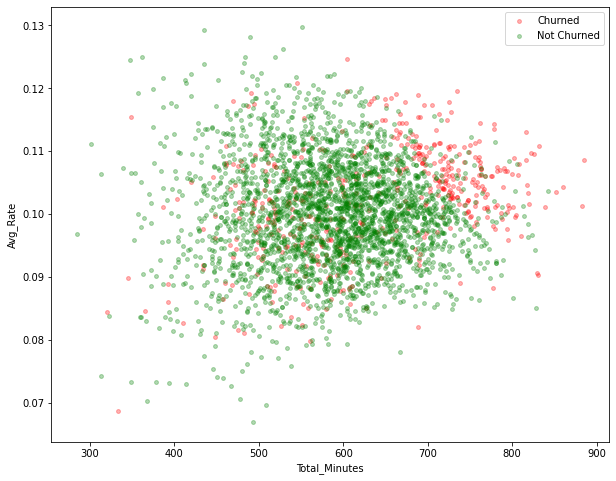

In [42]:
## Create the second plot
# this figure requires making 2 plots on the same figure: one for churned, one for not 
# (e.g. select the rows that are churned (or not) and the appropriate column for the x and y values that go into the scatter plot function)
# Recall, you can select a subset of a particular column using the syntax: df.loc[conditions, 'column name']
# note the condition to select churned (not) customer should be orange.Churn == True (orange.Churn == False)

# make the churned group color red
# make the not churned group color green

# adjust the transparency, dot size, etc. to make the figure appealing
# CREATE A LEGEND, make sure the legend is legible
# make the figure size 10 x 8

plt.figure(figsize = (10,8))
plt.scatter(orange.loc[orange.Churn==True,'Total_Minutes'],orange.loc[orange.Churn==True,'Avg_Rate'], c = 'red', s = 15, alpha = .3)
plt.scatter(orange.loc[orange.Churn==False,'Total_Minutes'],orange.loc[orange.Churn==False,'Avg_Rate'], c = 'green', s = 15, alpha = .3)
plt.xlabel('Total_Minutes')
plt.ylabel('Avg_Rate')
plt.legend(['Churned', 'Not Churned'])












**Double Click to Edit**

Answers

1. (Describe what kind of customers are especially likely to churn)
Customers who speak for about 700 minutes have an average rate of .10. 
    1. (State a reason for why this may be the case)
    The individual is very active and always on the go, so they could have a higher possibility of churning.